## Lesson 10:
### Exercise 0: Computing $\pi$ numerically + extension to higher dimensions


In [212]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

  0%|          | 0/1000 [00:00<?, ?it/s]

1000 798
Pi = 3.192


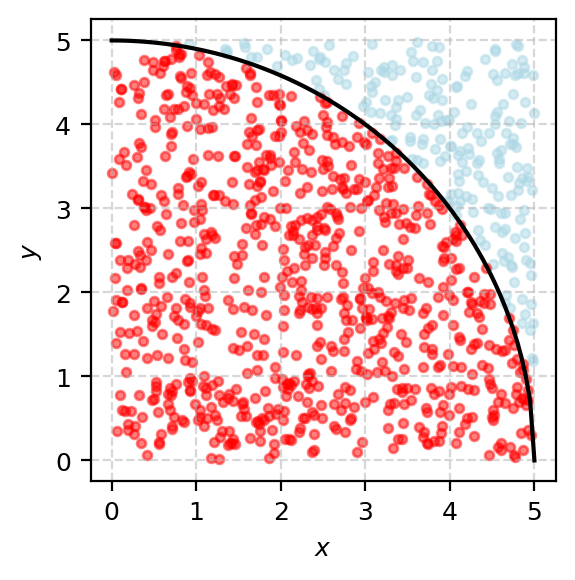

In [276]:
def quarter_circle(x, r):
    return np.sqrt(r**2 - x**2)

fig, ax = plt.subplots(figsize=(3,3))
r = 5
xgrid = np.linspace(0, r, 100)
ycircle = quarter_circle(xgrid, r)
plt.plot(xgrid, ycircle, c='k')

N_count = 0
N_sample = 1000
for n in tqdm(np.arange(0, N_sample)):
    x = r*np.random.random()
    y = r*np.random.random()
    if y < quarter_circle(x, r):
        N_count += 1
        plt.scatter(x, y, c='red', s=10, alpha=0.5)
    else:
        plt.scatter(x, y, c='lightblue', s=10, alpha=0.5)
        
plt.grid(ls='dashed', alpha=0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
print(N_sample, N_count)
print('Pi =', N_count/N_sample * 4)

Now let's generalize to the case of **n dimensions**: The circle becomes an hypersphere.

In [257]:
def ndim_distance(x):
    return np.sqrt(np.sum(x**2, axis=0))

#Check that for n = 2 we recover Pi
ndim = 2
r = 5
N_sample = 100000
samples = r*np.random.uniform(size=(ndim, N_sample))
good_pts = np.sum(ndim_distance(samples) < r)

print(f'The ratio between the volume of the %i-dimensional sphere and the total volume is: %.3f'% (ndim, (2**ndim)*good_pts/N_sample))

The ratio between the volume of the 2-dimensional sphere and the total volume is: 3.136


- Now we can iterate the process to an array of dimensions: 

  0%|          | 0/29 [00:00<?, ?it/s]

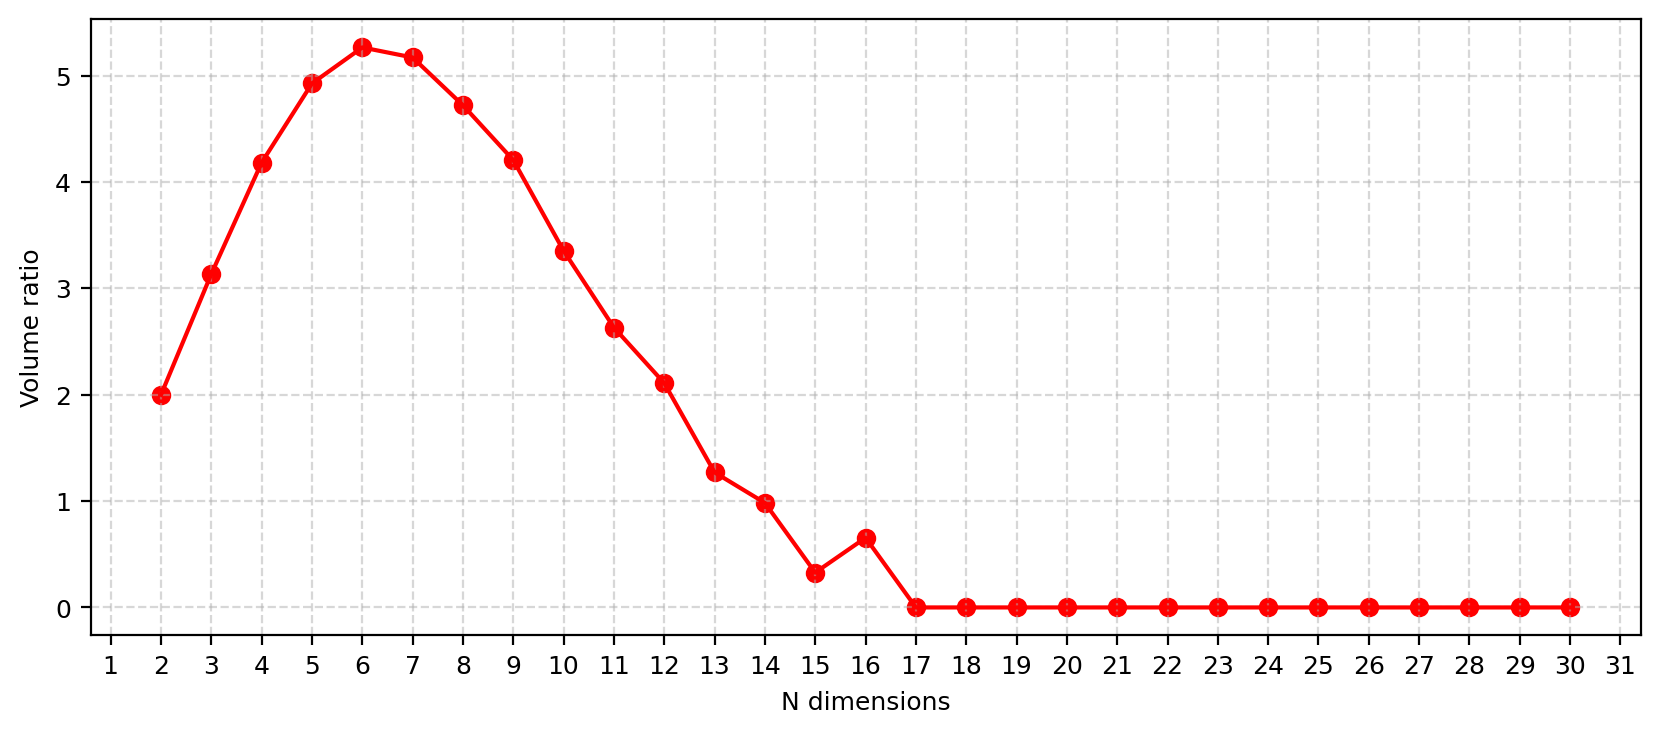

In [269]:
plt.rcParams['font.size'] = 9
fig, ax = plt.subplots(figsize=(10, 4))
r = 5

N_sample = 100000
n_max = 30
ndims = np.arange(1, n_max)
result = []
for n in tqdm(ndims):
    samples = r*np.random.uniform(size=(n, N_sample))
    good_pts = np.sum(ndim_distance(samples) < r)
    volume_ratio = (2**n)*good_pts/N_sample
    result.append(volume_ratio)

plt.plot(ndims+1, result, c='red')
plt.scatter(ndims+1, result, c='red')
plt.grid(ls='dashed', alpha=0.5)
plt.ylabel('Volume ratio')
plt.xlabel('N dimensions')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))